In [1]:
import xgboost
import shap
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import plots as plots
import pickle

/opt/homebrew/Caskroom/miniforge/base/envs/xai/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Load data and models

In [2]:
data = pickle.load(open('xgb_models/data3.pkl', 'rb'))
model = pickle.load(open('xgb_models/opt_XGB_YN3.pkl', 'rb'))

X_train_target = data['X_train_target'].sort_index()
X = data['X']

X_train = data['X_train'].sort_index()
X_test = data['X_test'].sort_index()
X_val = data['X_val'].sort_index()
X_all = data['X_all'].sort_index()

y_train = data['y_train'].sort_index()
y_test = data['y_test'].sort_index()
y_val = data['y_val'].sort_index()
y = data['y']

## Accuracy

In [3]:
print('Training score: %.2f%%' %(model.score(X_train, y_train) * 100))
print('Testing score: %.2f%%' %(model.score(X_test, y_test) * 100))
print('Overall score: %.2f%%' %(model.score(X_all, y) * 100))

Training score: 89.65%
Testing score: 81.75%
Overall score: 87.95%


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Confusion matrix, without normalization
[[3105  212]
 [ 375 1978]]
Normalized confusion matrix
[[0.94 0.06]
 [0.16 0.84]]
Confusion matrix, without normalization
[[549  69]
 [125 320]]
Normalized confusion matrix
[[0.89 0.11]
 [0.28 0.72]]


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


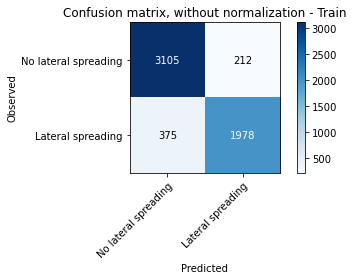

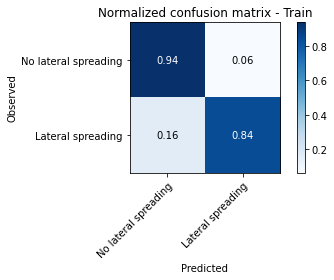

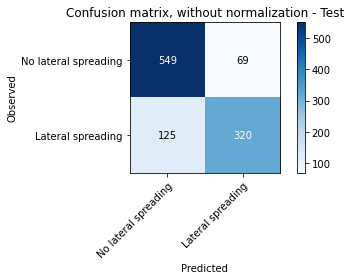

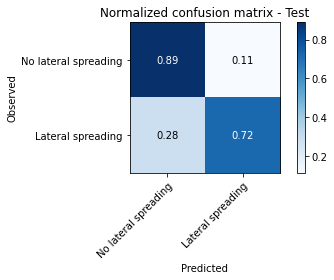

Confusion matrix, without normalization
[[3822  310]
 [ 544 2412]]
Normalized confusion matrix
[[0.92 0.08]
 [0.18 0.82]]


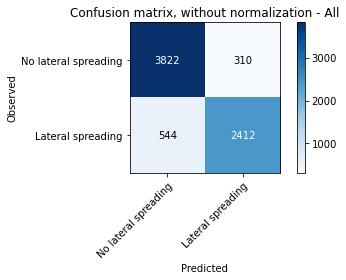

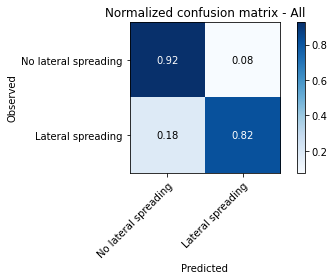

In [4]:
#make prediction
Y_pred_test = model.predict(X_test)
Y_pred_train = model.predict(X_train)
Y_pred_all = model.predict(X_all)

#assign class names
class_names=np.array(['No lateral spreading','Lateral spreading'], dtype='U25')

# Plot non-normalized confusion matrix for training dataset
np.set_printoptions(precision=2)
plots.plot_confusion_matrix(y_train, Y_pred_train, classes=class_names,
                      title='Confusion matrix, without normalization - Train')

# Plot normalized confusion matrix for training dataset
plots.plot_confusion_matrix(y_train, Y_pred_train, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - Train')

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix for testing dataset
plots.plot_confusion_matrix(y_test, Y_pred_test, classes=class_names,
                      title='Confusion matrix, without normalization - Test')

# Plot normalized confusion matrix for testing dataset
plots.plot_confusion_matrix(y_test, Y_pred_test, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - Test')
plt.show()


# Plot non-normalized confusion matrix for whole dataset
plots.plot_confusion_matrix(y, Y_pred_all, classes=class_names,
                      title='Confusion matrix, without normalization - All')

# Plot normalized confusion matrix for whole dataset
plots.plot_confusion_matrix(y, Y_pred_all, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - All')
plt.show()

In [5]:
def plot_summary(idx):
    shap.plots.waterfall(shap_values[idx])
    plots.prob_barh(model.predict_proba(X_train)[idx])
    print('Percentile compare to the overall dataset')
    plots.percentile_score(shap_values[idx],X_all)

# Local explanations

In [6]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [8]:
X_train.reset_index()
X_train_target.reset_index()

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target
0,0,182.0,0.370809,0.909116,0.319117,5.465739,0.546270,0
1,2,8292.0,1.300896,0.847858,0.195947,0.849104,0.532398,0
2,3,15629.0,1.788212,2.044325,0.115795,0.451034,0.542307,0
3,4,183.0,1.637517,2.003797,0.137265,0.941866,0.545784,1
4,5,158.0,1.165643,0.992154,0.073885,2.699290,0.535794,0
...,...,...,...,...,...,...,...,...
5665,7285,43157.0,1.536784,5.712025,0.390255,0.912147,0.420179,0
5666,7286,43156.0,1.631807,5.597727,0.352863,0.839925,0.420179,0
5667,7288,14690.0,1.500085,5.643462,0.441609,0.360601,0.420179,0
5668,7289,16989.0,1.775998,5.511121,0.353520,1.204065,0.420179,0


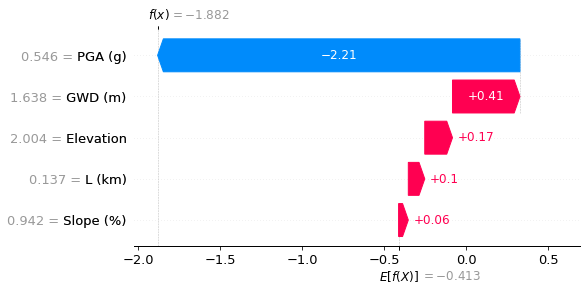

In [161]:
shap.plots.waterfall(shap_values[3])

In [147]:
xtnp = X_train.to_numpy()

In [143]:
X_train.loc[X_train['L (km)'] > 2]

,GWD (m),Elevation,L (km),Slope (%),PGA (g)
123,1.080214,3.697681,2.263345,0.332548,0.374729
127,1.656910,3.694288,2.232165,0.237357,0.374729
140,1.605895,3.570586,2.199005,0.237995,0.377088
161,1.566298,3.407045,2.154551,0.909582,0.377088
165,1.566298,3.561052,2.157100,0.473178,0.377088
...,...,...,...,...,...
7083,2.128562,5.483317,2.150242,1.513339,0.347488
7085,1.751606,5.538033,2.130424,2.994083,0.347488
7086,1.582299,4.452471,2.258633,1.660096,0.335577
7087,1.506965,4.715303,2.236772,1.980683,0.335577


## Case of no lateral spreading

In [132]:
X_train_target.loc[4]

Test ID      183.000000
GWD (m)        1.637517
Elevation      2.003797
L (km)         0.137265
Slope (%)      0.941866
PGA (g)        0.545784
Target         1.000000
Name: 4, dtype: float64

In [140]:
X_train

,GWD (m),Elevation,L (km),Slope (%),PGA (g)
0,0.370809,0.909116,0.319117,5.465739,0.546270
2,1.300896,0.847858,0.195947,0.849104,0.532398
3,1.788212,2.044325,0.115795,0.451034,0.542307
4,1.637517,2.003797,0.137265,0.941866,0.545784
5,1.165643,0.992154,0.073885,2.699290,0.535794
...,...,...,...,...,...
7285,1.536784,5.712025,0.390255,0.912147,0.420179
7286,1.631807,5.597727,0.352863,0.839925,0.420179
7288,1.500085,5.643462,0.441609,0.360601,0.420179
7289,1.775998,5.511121,0.353520,1.204065,0.420179


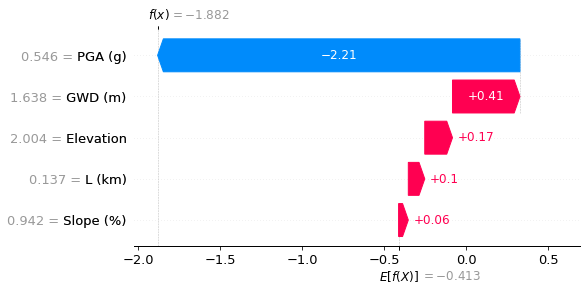

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


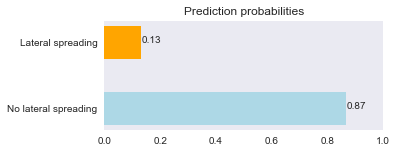

Percentile compare to the overall dataset


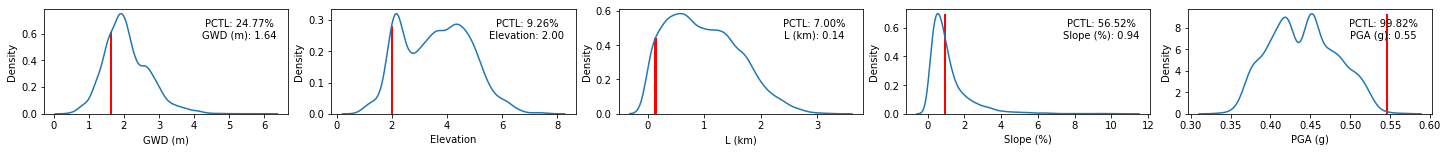

In [141]:
# visualize no lateral spreading prediction explanation
idx = 3
plot_summary(idx)

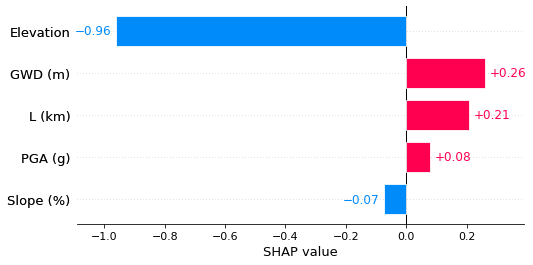

In [ ]:
idx = 0
shap.plots.bar(shap_values[idx])

## Case of lateral spreading

In [28]:
X_train_target.loc[X_train_target['Target']==1]

,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target
2521,1.970810,3.877194,0.633879,0.520370,0.455023,1
3880,1.973019,3.065740,0.535578,1.191476,0.490235,1
3729,1.800350,2.548898,0.378419,2.852087,0.487259,1
156,1.515690,2.257363,0.951825,0.262859,0.410716,1
2982,1.688975,3.036327,0.626777,0.561545,0.466868,1
...,...,...,...,...,...,...
6938,1.919524,2.170000,0.206755,0.633201,0.451388,1
5126,2.675168,4.995571,1.403763,2.470708,0.400831,1
3453,1.470225,3.358428,1.117961,1.722584,0.465088,1
2675,1.979449,3.538947,0.664731,0.969988,0.461018,1


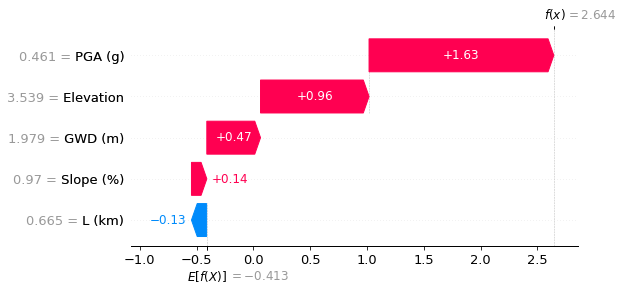

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


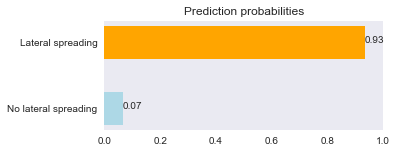

Percentile compare to the overall dataset


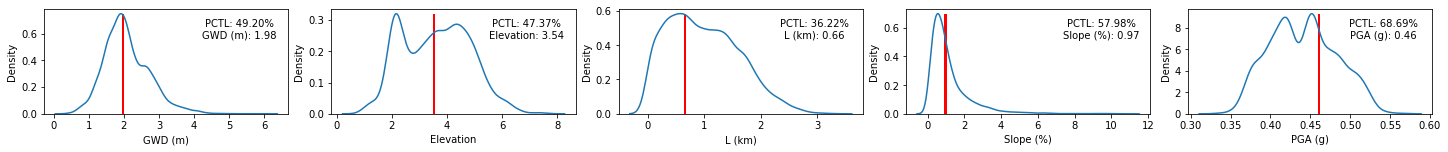

In [22]:
# visualize lateral spreading prediction's explanation
idx = 5668
plot_summary(idx)

In [ ]:
# visualize lateral spreading explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[2])

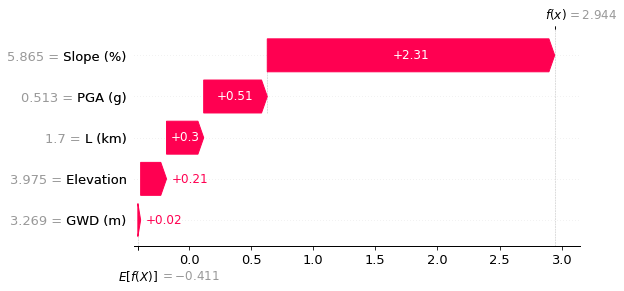

Target    1
Name: 1100, dtype: int64


In [ ]:
# visualize lateral spreading prediction's explanation - A case of high slope angle
shap.plots.waterfall(shap_values[3016])
print(y_train.iloc[3016])

# Local explanations (Grouped by Type)

## Accuracy

In [ ]:
# make prediction
preds = model.predict(X_test)
predictions = [round(value) for value in preds]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.72%


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [ ]:
# Create a dataframe with errors
test_targets = X_test_target['Target']
error = predictions - test_targets
testdf = pd.concat([X_test_target, pd.DataFrame({'error':error})], axis=1)

## True Positive

In [ ]:
# Target = 1 (lateral spreading)
tp = testdf[testdf['error'] == 0]
tp = tp[tp['Target'] == 1]

X_true_pos = tp.drop(['Target', 'error'], axis=1)
tp

,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
831,2.032844,2.184585,0.188465,0.356181,0.452941,1,0
641,2.810952,5.397034,1.652887,0.959647,0.492253,1,0
3000,2.102416,4.072007,0.903481,0.396884,0.460277,1,0
233,1.601831,3.278744,0.329205,2.648838,0.443143,1,0
3352,1.694889,3.111853,0.788277,1.098163,0.469252,1,0
...,...,...,...,...,...,...,...
470,2.716594,3.939198,1.033595,2.681163,0.474235,1,0
2828,2.137872,0.000000,1.891575,0.000000,0.411182,1,0
6193,1.185998,1.992755,0.008484,0.898328,0.471589,1,0
3369,1.363289,3.330142,1.090190,0.243576,0.462743,1,0


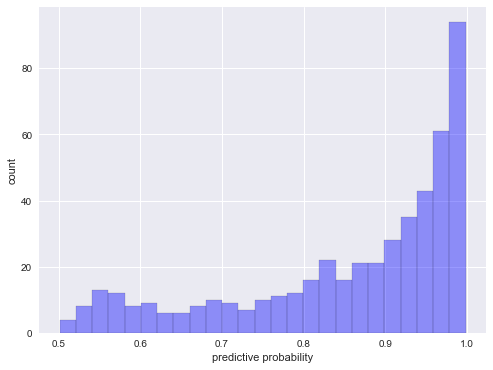

In [ ]:
# Prediction probability
prob = model.predict_proba(X_true_pos)
plot_pred_prob(prob[:,1])

In [ ]:
# SHAP values of false positive dataset
tp_shap_values = explainer(X_true_pos)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


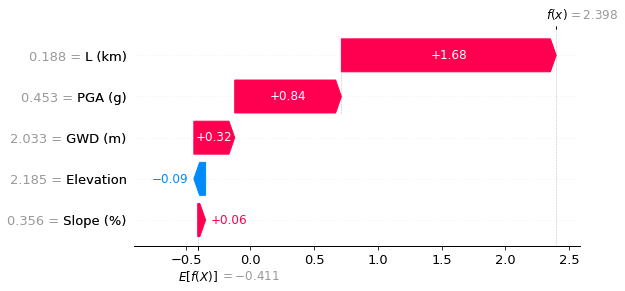

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


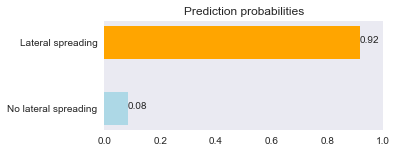

In [ ]:
# visualize lateral spreading prediction's explanation
idx = 0
shap.plots.waterfall(tp_shap_values[idx])
plot_barh(model.predict_proba(X_true_pos)[idx])

#### Large distance (L > 2 km), why do we still predict lateral spreading?

In [ ]:
tpfar = tp[tp['L (km)'] > 2]
Xfar = tpfar.drop(['Target', 'error'], axis=1)
tpfar

,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
2551,1.661655,0.000000,2.268492,0.000000,0.399452,1,0
4270,1.254269,4.898041,2.206965,0.751614,0.378288,1,0
2797,1.750575,0.000000,2.308057,0.000000,0.401707,1,0
4328,0.850854,3.960492,2.354993,0.534235,0.380259,1,0
3093,1.921273,0.000000,2.444558,0.000000,0.400819,1,0
2839,1.754800,0.000000,2.291791,0.000000,0.401707,1,0
2569,1.690768,0.000000,2.064171,0.000000,0.402578,1,0
2619,1.545700,0.000000,2.052396,0.000000,0.402578,1,0
2707,1.695215,0.000000,2.289310,0.000000,0.401707,1,0
5210,2.251534,5.000974,2.021386,0.960506,0.381165,1,0


In [ ]:
# SHAP values of X far dataset
xfar_shap_values = explainer(Xfar)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


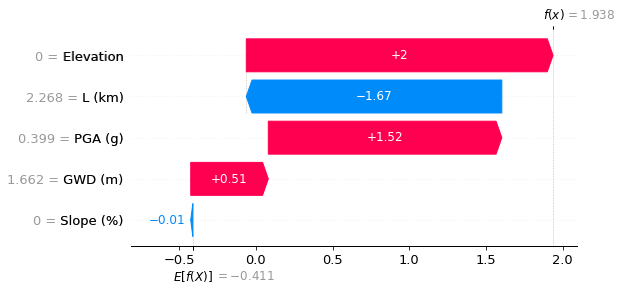

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


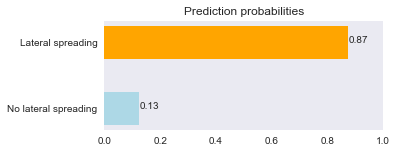

In [ ]:
# visualize lateral spreading prediction's explanation
idx = 0
shap.plots.waterfall(xfar_shap_values[idx])
plot_barh(model.predict_proba(Xfar)[idx])

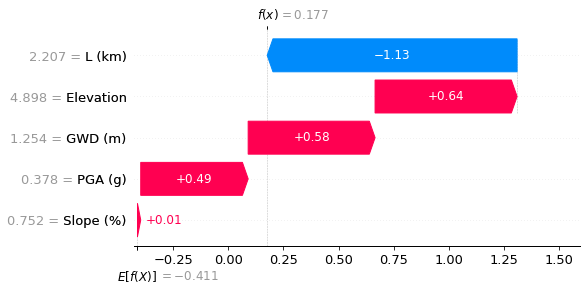

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


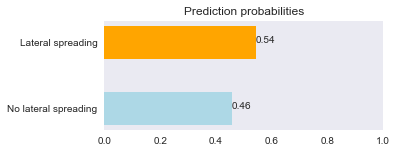

In [ ]:
# visualize lateral spreading prediction's explanation
idx = 1
shap.plots.waterfall(xfar_shap_values[idx])
plot_barh(model.predict_proba(Xfar)[idx])

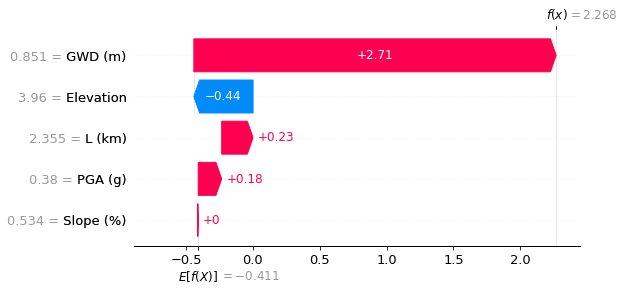

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


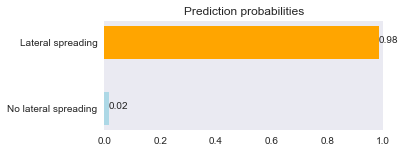

In [ ]:
# visualize lateral spreading prediction's explanation
idx = 3
shap.plots.waterfall(xfar_shap_values[idx])
plot_barh(model.predict_proba(X_true_pos)[idx])

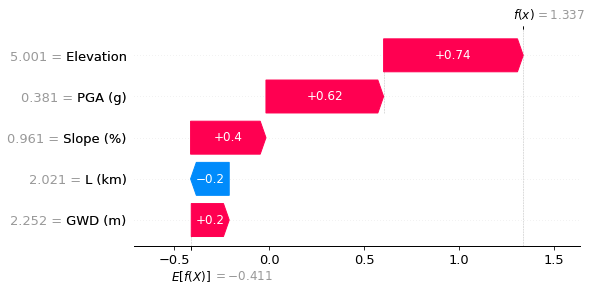

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


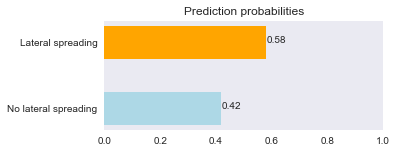

In [ ]:
# visualize lateral spreading prediction's explanation, low water table
idx = 9
shap.plots.waterfall(xfar_shap_values[idx])
plot_barh(model.predict_proba(X_true_pos)[idx])

## True Negative

In [ ]:
# Target = 0 (no-lateral spreading)
tn = testdf[testdf['error'] == 0]
tn = tn[tn['Target'] == 0]

X_true_neg = tn.drop(['Target', 'error'], axis=1)
tn

,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
4721,1.520208,4.535532,1.408396,0.993836,0.406295,0,0
4447,1.295173,4.318707,2.174675,0.375034,0.382730,0,0
2039,2.791280,4.065040,0.810139,1.332437,0.416318,0,0
6486,2.183014,2.166952,0.417520,0.779208,0.454220,0,0
864,1.842521,2.089193,0.336951,0.392722,0.458767,0,0
...,...,...,...,...,...,...,...
1096,4.344453,5.927958,1.857861,3.596380,0.516319,0,0
276,2.785572,2.087179,0.911250,0.606944,0.506586,0,0
401,2.403624,4.883755,1.017401,1.960305,0.490088,0,0
4004,2.953431,3.946183,0.732476,3.012807,0.483830,0,0


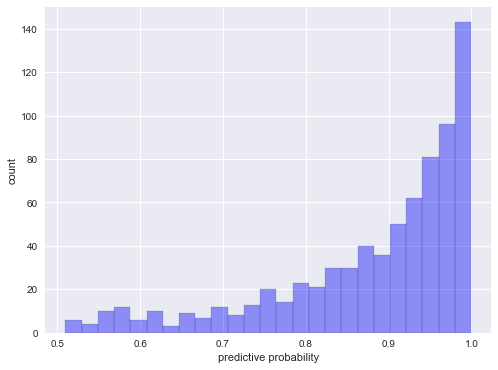

In [ ]:
# Prediction probability
prob = model.predict_proba(X_true_neg)
plot_pred_prob(prob[:,0])

In [ ]:
# SHAP values of X far dataset
tn_shap_values = explainer(X_true_neg)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


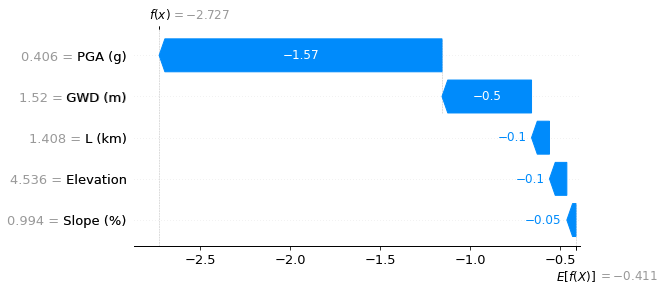

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


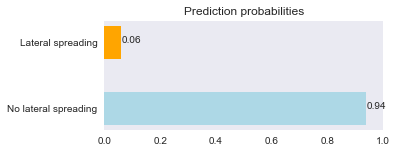

In [ ]:
# visualize lateral spreading prediction's explanation
idx = 0
shap.plots.waterfall(tn_shap_values[idx])
plot_barh(model.predict_proba(X_true_neg)[idx])

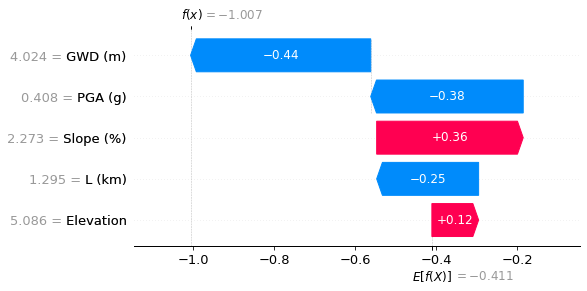

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


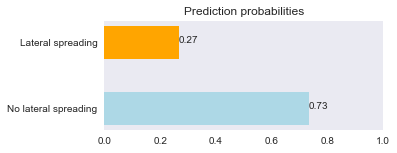

In [ ]:
# visualize lateral spreading prediction's explanation
idx = 41
shap.plots.waterfall(tn_shap_values[idx])

plot_barh(model.predict_proba(X_true_neg)[idx])

### False positive

In [ ]:
# Error is 1 means prediction 1 (lateral spreading) while target is 0 (no-lateral spreading)
fp = testdf[testdf['error'] == 1]

X_false_pos = fp.drop(['Target', 'error'], axis=1)
fp

,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
3016,2.179170,0.000000,1.956249,0.000000,0.413459,0,1
6511,2.640565,3.118182,0.035327,4.665368,0.424457,0,1
6450,2.354515,2.911323,0.279766,0.436656,0.458489,0,1
3365,2.721586,5.466979,1.239207,5.670625,0.449371,0,1
5708,2.106421,2.734850,0.185466,1.495505,0.442483,0,1
...,...,...,...,...,...,...,...
3083,2.095482,4.537524,1.004010,0.673223,0.453596,0,1
5780,2.314931,2.766711,0.431021,1.982780,0.430679,0,1
7105,2.058659,3.805578,1.753357,5.645064,0.359245,0,1
3171,2.050342,3.381300,0.560812,1.952973,0.470164,0,1


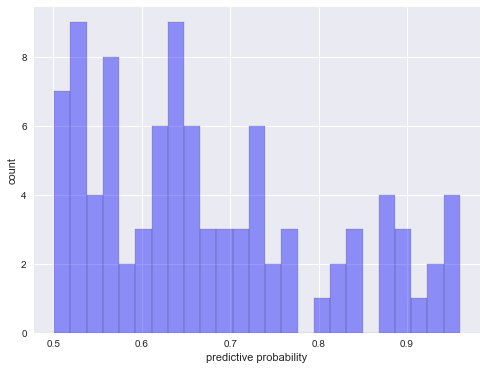

In [ ]:
# Prediction probability
prob = model.predict_proba(X_false_pos)
plot_pred_prob(prob[:,1])

In [ ]:
# SHAP values of false positive dataset
fp_shap_values = explainer(X_false_pos)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


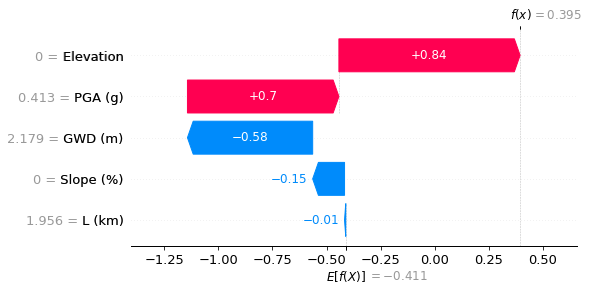

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


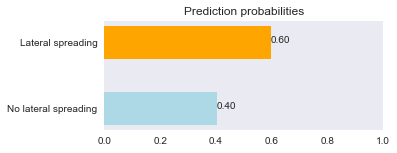

In [ ]:
# visualize lateral spreading prediction's explanation - The elevation and slope values are zero
idx=0
shap.plots.waterfall(fp_shap_values[idx])
plot_barh(model.predict_proba(X_false_pos)[idx])

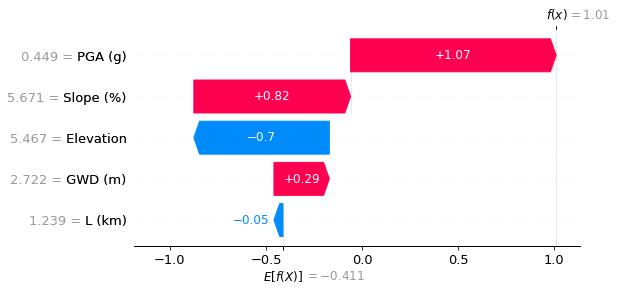

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


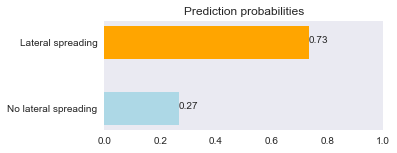

In [ ]:
#  The elevation and slope values are large
idx=3
shap.plots.waterfall(fp_shap_values[idx])
plot_barh(model.predict_proba(X_false_pos)[idx])

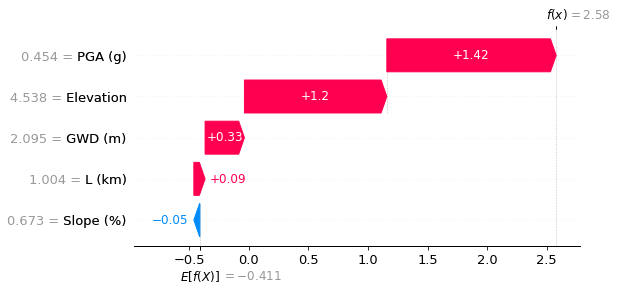

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


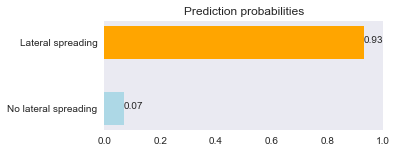

In [ ]:
#  High elevation and flat slope values
idx=89
shap.plots.waterfall(fp_shap_values[idx])
plot_barh(model.predict_proba(X_false_pos)[idx])

**In all false positives, the high PGA is what tripped the model.**

### False negatives

In [ ]:
# Error is -1 means prediction 0 (no-lateral spreading) while target is 1 (lateral spreading)
fn = testdf[testdf['error'] == -1]

X_false_neg = fn.drop(['Target', 'error'], axis=1)
fn

,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
6003,1.879269,2.382551,0.010498,3.174181,0.464802,1,-1
6816,1.432532,1.884559,0.515965,0.439989,0.453988,1,-1
4036,1.088380,0.877289,0.220572,0.254102,0.507725,1,-1
533,2.803994,4.605346,1.257001,0.735527,0.480200,1,-1
526,2.818855,5.736539,1.360140,0.557651,0.494229,1,-1
...,...,...,...,...,...,...,...
9,1.482130,1.488147,0.003209,3.220948,0.539283,1,-1
5430,1.896682,3.805564,0.953790,0.202917,0.409164,1,-1
660,1.773657,1.995088,0.365602,0.652486,0.454733,1,-1
2890,1.581852,0.000000,2.008923,0.000000,0.408003,1,-1


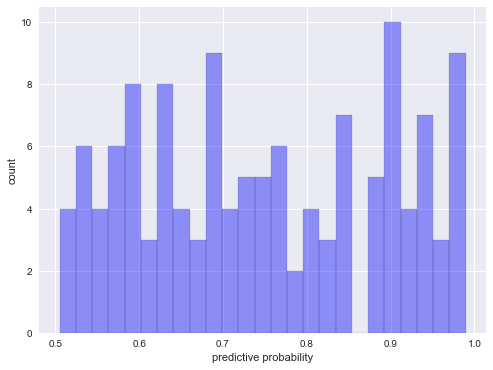

In [ ]:
# Prediction probability
prob = model.predict_proba(X_false_neg)
plot_pred_prob(prob[:,0])

In [ ]:
# SHAP values of false negative dataset
fn_shap_values = explainer(X_false_neg)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


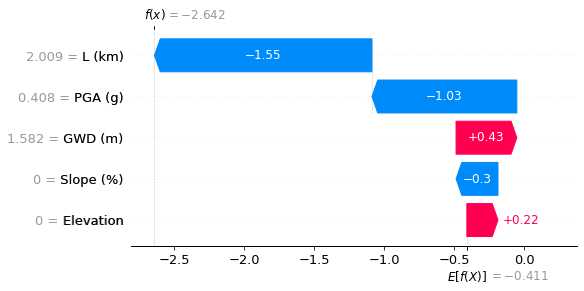

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


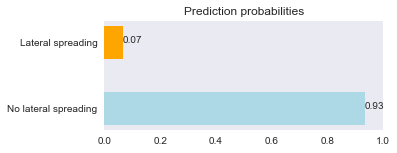

In [ ]:
# The elevation and slope values are zero
idx=127
shap.plots.waterfall(fn_shap_values[idx])
plot_barh(model.predict_proba(X_false_neg)[idx])

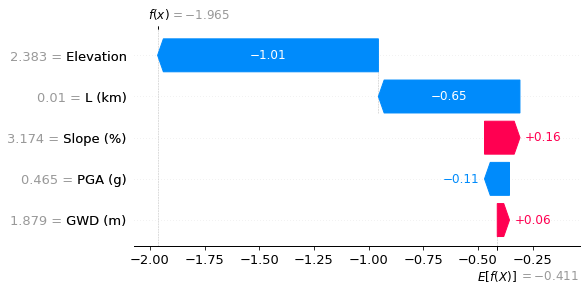

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


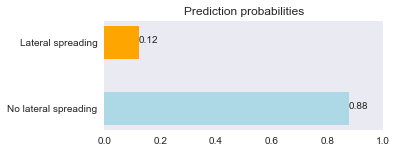

In [ ]:
# The elevation and slope values are non-zero
idx = 0
shap.plots.waterfall(fn_shap_values[idx])
plot_barh(model.predict_proba(X_false_neg)[idx])

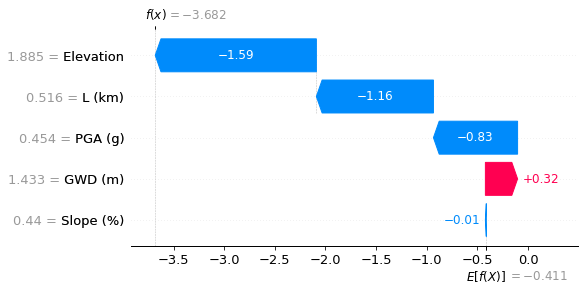

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


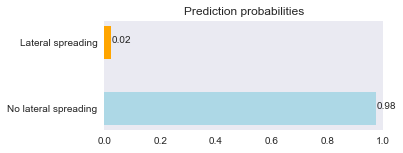

In [ ]:
# The elevation and slope values are non-zero
idx=1
shap.plots.waterfall(fn_shap_values[idx])
plot_barh(model.predict_proba(X_false_neg)[idx])

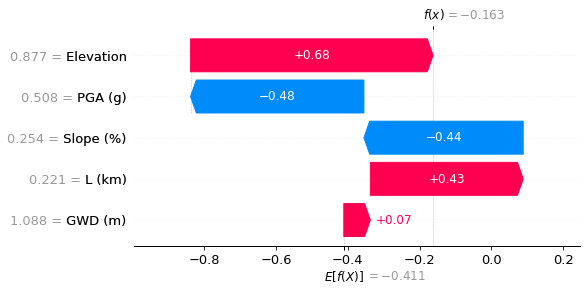

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


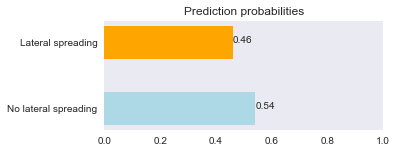

In [ ]:
# The elevation and slope values are non-zero
idx=2
shap.plots.waterfall(fn_shap_values[idx])
plot_barh(model.predict_proba(X_false_neg)[idx])

# Global explanations

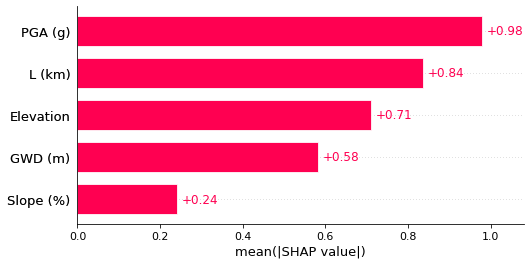

In [ ]:
shap.plots.bar(shap_values)

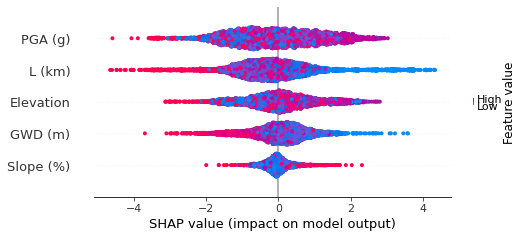

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

## True Positives

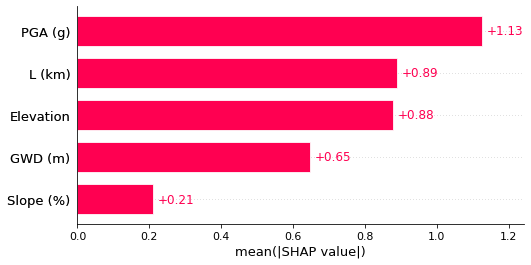

In [ ]:
shap.plots.bar(tp_shap_values)

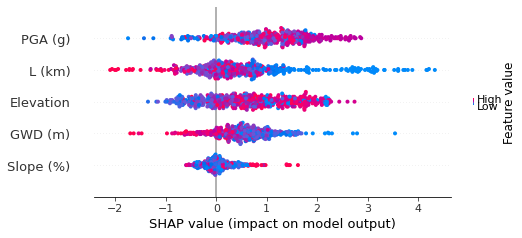

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(tp_shap_values)

### True negative

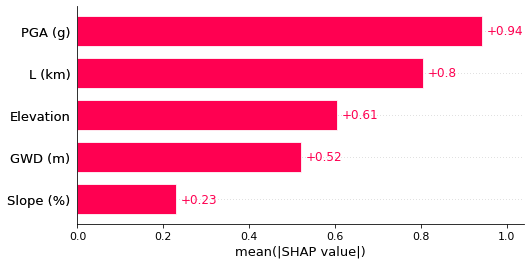

In [ ]:
shap.plots.bar(tn_shap_values)

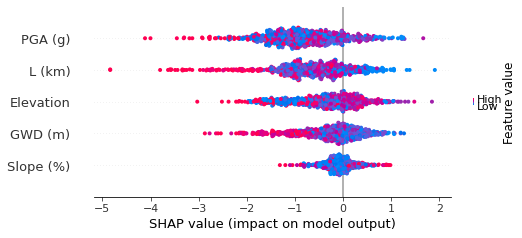

In [ ]:
shap.plots.beeswarm(tn_shap_values)

### False positives

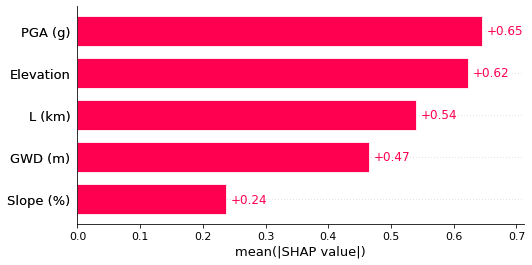

In [ ]:
shap.plots.bar(fp_shap_values)

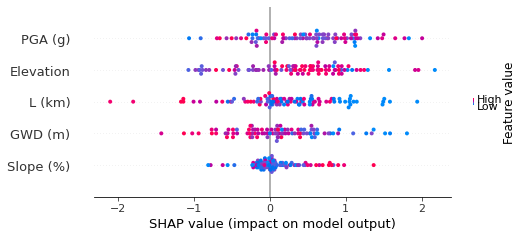

In [ ]:
shap.plots.beeswarm(fp_shap_values)

### False Negative

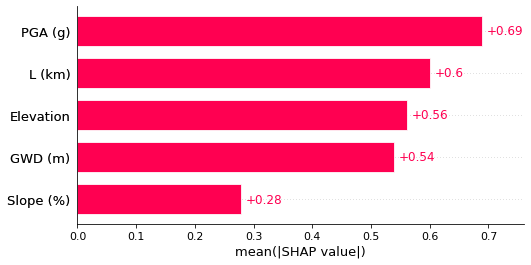

In [ ]:
shap.plots.bar(fn_shap_values)

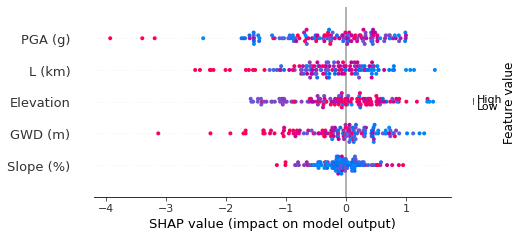

In [ ]:
shap.plots.beeswarm(fn_shap_values)

# Feature relations

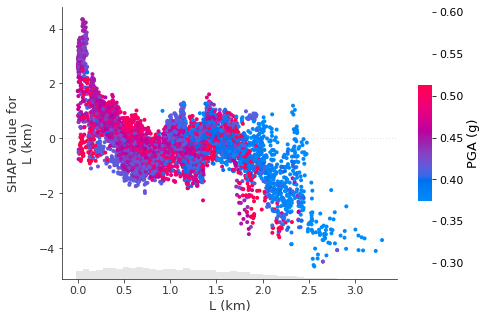

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"L (km)"], color=shap_values)

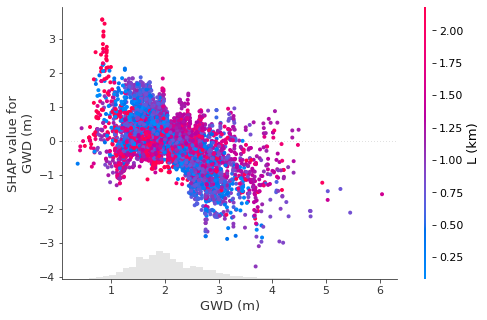

In [ ]:
shap.plots.scatter(shap_values[:,"GWD (m)"], color=shap_values)

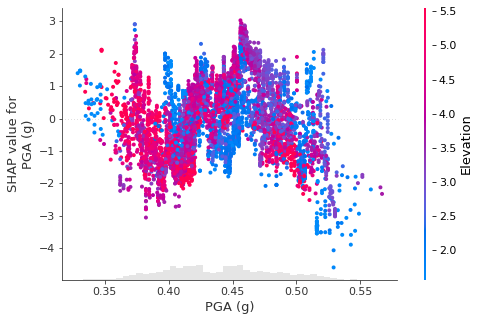

In [ ]:
shap.plots.scatter(shap_values[:,"PGA (g)"], color=shap_values)

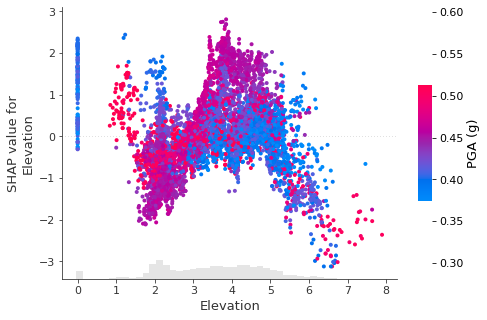

In [ ]:
shap.plots.scatter(shap_values[:,"Elevation"], color=shap_values)

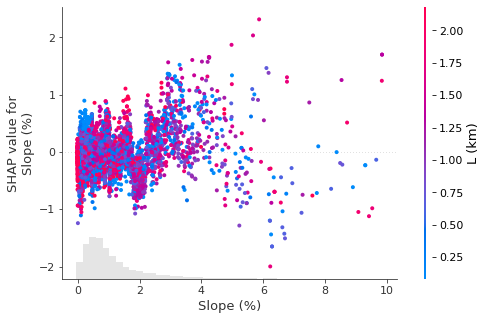

In [ ]:
shap.plots.scatter(shap_values[:,"Slope (%)"], color=shap_values)

# Unsupervised clustering

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster
from sklearn.datasets import make_blobs

import warnings
import sys

print("Python Version : ",sys.version)
print("Scikit-Learn Version : ",sklearn.__version__)

warnings.filterwarnings('ignore') ## We'll silent future warnings using this command.
np.set_printoptions(precision=3)

## Beow magic function fits plot inside of current notebook. 
## There is another option to it (%matplotlib notebook) which opens plot in new notebook.
%matplotlib inline

Python Version :  3.8.12 | packaged by conda-forge | (default, Jan 30 2022, 23:13:55) 
[Clang 11.1.0 ]
Scikit-Learn Version :  1.0.2


In [ ]:
# GWD datset
gwd = shap_values.data[:,0]
gwd_shap = shap_values.values[:,0]
gwd_shap_dataset = np.array(list(zip(gwd, gwd_shap)))
target = X_train_target['Target']

In [ ]:
kmeans = cluster.KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_kmeans = kmeans.fit_predict(gwd_shap_dataset)

In [ ]:
print('Cluster Centers : \n', str(kmeans.cluster_centers_))

Cluster Centers : 
 [[ 2.89  -0.89 ]
 [ 1.799  0.326]]


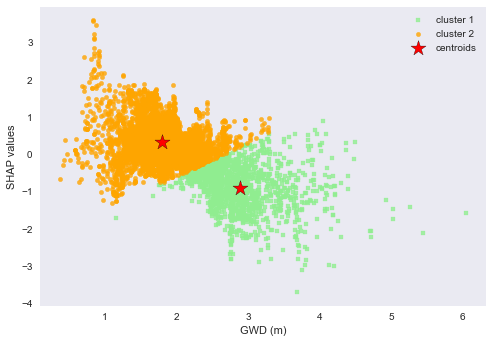

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    # plot the 2 clusters
    plt.scatter(
        gwd_shap_dataset[y_kmeans == 0, 0], gwd_shap_dataset[y_kmeans == 0, 1],
        s=20, c='lightgreen',
        marker='s', alpha = 0.8,
        label='cluster 1'
    )

    plt.scatter(
        gwd_shap_dataset[y_kmeans == 1, 0], gwd_shap_dataset[y_kmeans == 1, 1],
        s=20, c='orange',
        marker='o', alpha = 0.8,
        label='cluster 2'
    )

    # plot the centroids
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)

    plt.xlabel('GWD (m)')
    plt.ylabel('SHAP values')
    plt.grid()
    plt.show()

### Scatter plot of GWD (m) vs SHAP values

The GWD is the first column of the SHAP values matrix.

In [ ]:
# GWD datset
gwd = shap_values.data[:,0]
gwd_shap = shap_values.values[:,0]
gwd_shap_dataset = np.array(list(zip(gwd, gwd_shap)))
target = X_train_target['Target']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


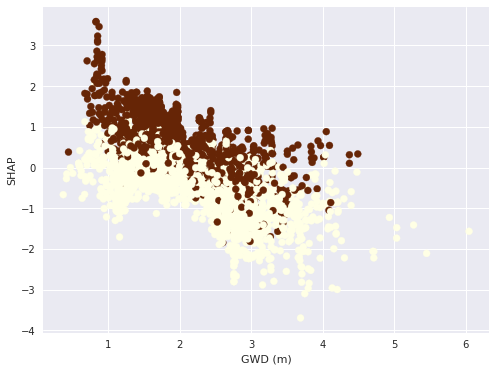

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(gwd, gwd_shap, c=target, cmap='YlOrBr')

    plt.xlabel('GWD (m)')
    plt.ylabel('SHAP')
    plt.legend(loc='best')

### Distance to river

In [ ]:
# GWD datset
l = shap_values.data[:,2]
l_shap = shap_values.values[:,2]
l_shap_dataset = np.array(list(zip(l, l_shap)))
target = X_train_target['Target']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


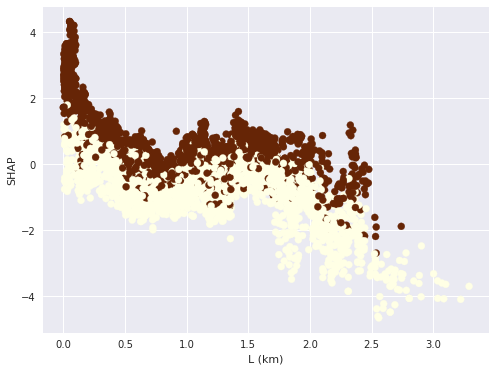

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(l, l_shap, c=target, cmap='YlOrBr')

    plt.xlabel('L (km)')
    plt.ylabel('SHAP')
    plt.legend(loc='best')

### PGA SHAP values

In [ ]:
# GWD datset
pga = shap_values.data[:,4]
pga_shap = shap_values.values[:,4]
pga_shap_dataset = np.array(list(zip(pga, pga_shap)))
target = X_train_target['Target']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


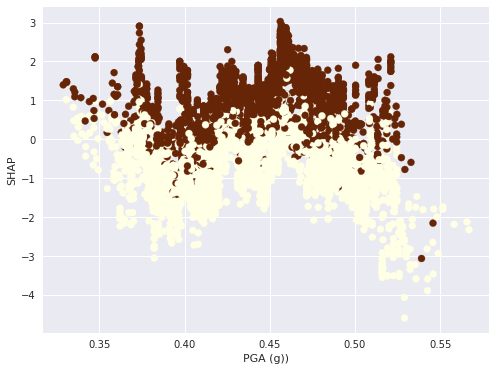

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(pga, pga_shap, c=target, cmap='YlOrBr')

    plt.xlabel('PGA (g))')
    plt.ylabel('SHAP')
    plt.legend(loc='best')

## Slope

In [ ]:
# GWD datset
slope = shap_values.data[:,3]
slope_shap = shap_values.values[:,3]
slope_shap_dataset = np.array(list(zip(pga, pga_shap)))
target = X_train_target['Target']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


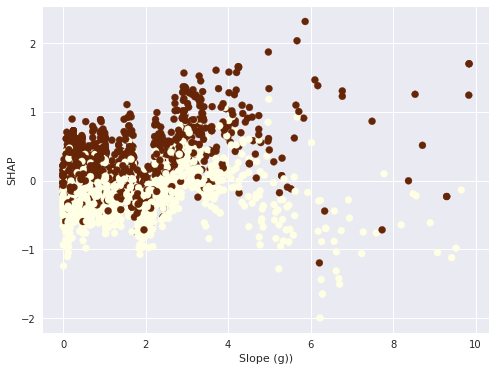

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(slope, slope_shap, c=target, cmap='YlOrBr')

    plt.xlabel('Slope (g))')
    plt.ylabel('SHAP')
    plt.legend(loc='best')

# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

xstd = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=3)
pcs = pca.fit_transform(xstd)
pcDf = pd.DataFrame(data = pcs, columns = ['PCA1', 'PCA2', 'PCA3'])
#pcDf = pd.concat([pcDf, target], axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


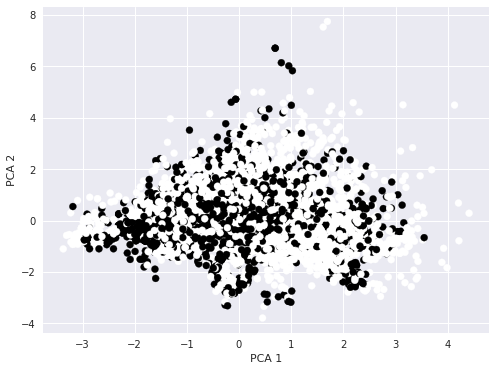

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(pcDf['PCA1'], pcDf['PCA2'], c=target)

    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


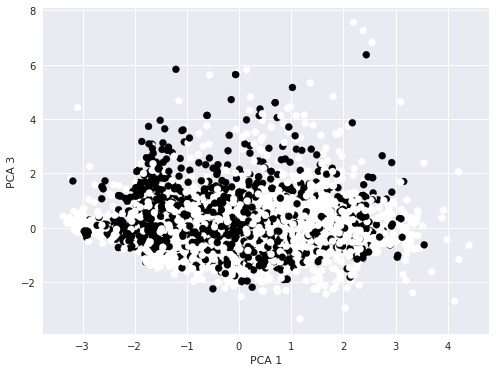

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(pcDf['PCA1'], pcDf['PCA3'], c=target)

    plt.xlabel('PCA 1')
    plt.ylabel('PCA 3')
    plt.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


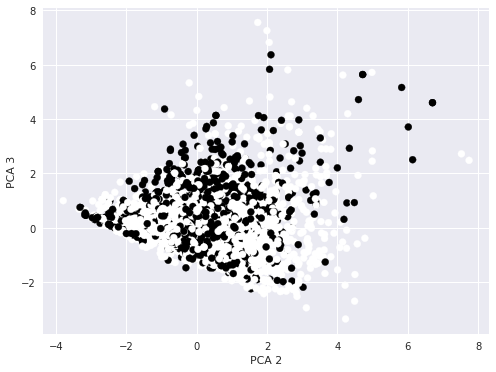

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(pcDf['PCA2'], pcDf['PCA3'], c=target)

    plt.xlabel('PCA 2')
    plt.ylabel('PCA 3')
    plt.legend(loc='best')

In [ ]:
# Regression fit
pcmodel = xgboost.XGBClassifier().fit(pcDf, target)


[08:49:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
xstd_test = StandardScaler().fit_transform(X_test)
pca = PCA(n_components=3)
ptestcs = pca.fit_transform(xstd_test)
ptestDf = pd.DataFrame(data = ptestcs, columns = ['PCA1', 'PCA2', 'PCA3'])
xtest_target = X_test_target['Target']

In [ ]:
# make prediction
preds = pcmodel.predict(ptestDf)
predictions = [round(value) for value in preds]
# evaluate predictions
accuracy = accuracy_score(xtest_target, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.74%
